# Imports sous Notebook Python
Dans ce TP, vous allez essentiellement programmer des classes dans un fichier que vous pourrez garder pour plus tard. Ces classes seront enregistrées dans des fichiers `Optim.py`  et `functions.py`. Cependant, le comportement par défaut d'un Notebook quand on demande d'importer un fichier est de ne pas le relire !!! Ainsi vos modifications dans les fichiers ne seront pas prises en compte. Pour que ce soit le cas, il faut lancer les commandes suivantes :

In [7]:
%load_ext autoreload
import matplotlib.pyplot as plt
%autoreload 2
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import Optim as opt
import functions as func

## Fonctionnement des classes et des fichiers de librairie sous python
Dans cette section, nous allons nous chauffer un peu et apprendre (si on ne le sait pas déjà) comment fonctionnent les classes et les fichiers sous python. Le fichier `Optim.py` est vide mais le fichier `functions.py` contient déjà une classe nommée `square`. Ouvrez le fichier `function.py`. Cette classe `square` a 4 sous-fonctions, la fonction `__init__` se lance à l'appel de la classe (instanciation) et les autres fonctions se lancent avec les commandes suivantes

In [8]:
import functions as func
print("***** INSTANCIATION")
J=func.square()
print("***** AUTRES FONCTIONS")
a=np.array([1,2])
print(J.eval(a))
print(J.grad(a))
print(J.Hess(a))
print("***** ERREUR")
a=np.array([1,2,3])
print(J.eval(a))


***** INSTANCIATION
Fonction (x,y) --> x^2/2+7/2*y^2
***** AUTRES FONCTIONS
14.5
[ 1 14]
[[1. 0.]
 [0. 7.]]
***** ERREUR
Erreur de taille de x, on a  3  au lieu de  2
14.5


Sur le même modèle que précédemment, votre fonction doit vous rendre une erreur si on essaie de calculer un gradient ou une Hessienne en un point `a` qui n'est pas de taille `2`

In [9]:
import functions as func
J=func.square()
a=np.array([1,2,3])
print(J.grad(a))
print(J.Hess(a))


Fonction (x,y) --> x^2/2+7/2*y^2
[ 1 14]
[[1. 0.]
 [0. 7.]]


## Fonctions d'affichage
On va se servir des fonctions d'affichage de matplotlib, qui sont `contour` ou `surf`. Essayez de comprendre les fonctions ci-dessous.

Text(0.5, 1.0, 'Ligne de niveaux')

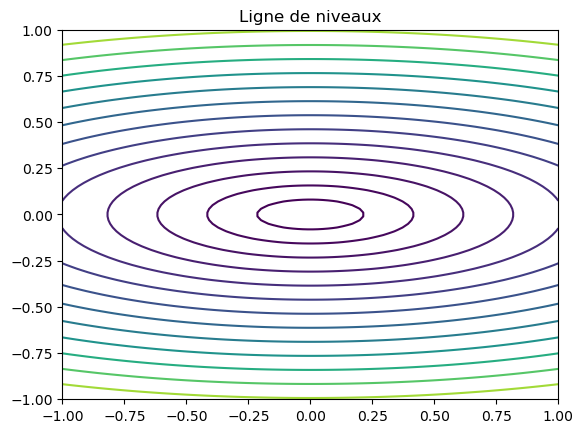

In [10]:
x = np.linspace(-1.0, 1.0, 100)
y = np.linspace(-1.0, 1.0, 100)
X, Y = np.meshgrid(x, y)
Z = 0.5*X**2+7*0.5*Y**2
levels=np.linspace(0.01,2,15)**2
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z,levels)
#ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Ligne de niveaux')


/var/folders/sp/4b83tkcj5bl3kgv92lfhbqf40000gn/T/ipykernel_69523/1416286602.py:5: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


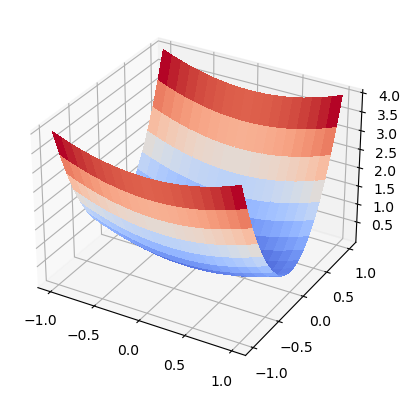

In [11]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')

x = np.linspace(-1.0, 1.0, 20)
y = np.linspace(-1.0, 1.0, 20)
X, Y = np.meshgrid(x, y)
Z = 0.5*X**2+7*0.5*Y**2
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Implémentation de nouvelles fonctions
Dans le fichier `functions.py`, créez une classe nommée `Rosen()` sur le modèle de `square()` qui calcule la fonction, le gradient ou la Hessienne de :
$$ f:(x,y)\mapsto 100*(y-x^2)^2 +(1-x)^2$$
Créez aussi une fonction `oscill()` qui calcule la fonction, le gradient ou la Hessienne de :
$$ g:(x,y)\mapsto \frac 1 2 x^2 +x\cos(y)$$


In [12]:
import functions as func
R=func.Rosen()
O=func.oscill()
a=np.array([1.3,2.45])
print(R.eval(a)) # 57.85
print(O.eval(a)) # -0.15630063026149965
print(R.grad(a))
print(R.Hess(a))
print(O.grad(a))
print(O.Hess(a))


57.85
-0.15630063026149965
[-394.6  152. ]
[[1050. -520.]
 [-520.  200.]]
[ 0.52976875 -0.82909411]
[[ 1.         -0.6377647 ]
 [-0.6377647   1.00130063]]


# Tests de dérivées numériques
Volontairement, je ne vous ai pas donné les réponses pour le gradient et la Hessienne. Avant de continuer, il faut vérifier que vos calculs sont bons. Pour cela on va faire des tests avec le gradient et la dérivée numérique. Pour ce faire on va partir d'un point $a$ quelconque et on prend une direction $d$ aléatoire. On compare ensuite pour plusieurs valeurs de $\varepsilon$ entre 1.e-8 et 1.e-1 les valeurs suivantes :
$$\frac{J(a+\varepsilon d) -J(a)}{\varepsilon} \simeq (\nabla J(a),d)$$
$$\frac{\nabla J(a+\varepsilon d) -\nabla J(a))}{\varepsilon} \simeq HJ(a)d$$
On rappelle que quand on compare deux nombres $b$ et $c$, on s'intéresse au nombre $b/c$. Quand on compare deux vecteurs $b$ et $c$, on s'intéresse au ratio des normes et à l'angle donné par 
$$\frac{(b,c)}{\Vert b \Vert \Vert c\Vert}$$
Créez une fonction `deriv_num(J,a,d,compute_grad=True,compute_Hess=True)` dans `Optim.py` qui teste la dérivée numérique d'une fonction `J`. Les arguments `compute_grad` et `compute_Hess` sont optionnels et déterminent si on doit vérifier le calcul de `J` pour son gradient et sa Hessienne. Ensuite testez votre code pour les 3 fonctions.

In [13]:
import functions as func
import Optim as opt
import numpy as np
np.random.seed(42)
a=np.random.randn(2)
d=np.random.randn(2)
opt.deriv_num(func.Rosen(),a,d)

eps 1.000e-01grad 1.5e-01ratio 1.0e-02angle 3.4e-03
eps 1.000e-02grad 1.6e-02ratio 1.1e-03angle 3.7e-05
eps 1.000e-03grad 1.6e-03ratio 1.1e-04angle 3.8e-07
eps 1.000e-04grad 1.6e-04ratio 1.1e-05angle 3.8e-09
eps 1.000e-05grad 1.6e-05ratio 1.1e-06angle 3.8e-11
eps 1.000e-06grad 1.6e-06ratio 1.1e-07angle 3.8e-13
eps 1.000e-07grad 1.6e-07ratio 1.2e-08angle 3.8e-15
eps 1.000e-08grad 1.1e-08ratio 2.1e-09angle 0.0e+00
eps 1.000e-09grad 6.7e-08ratio 5.1e-08angle 4.4e-16
eps 1.000e-10grad 5.0e-07ratio 3.5e-07angle 1.8e-13
eps 1.000e-11grad 2.6e-06ratio 4.4e-06angle 5.6e-12
eps 1.000e-12grad 1.5e-08ratio 8.7e-05angle 4.9e-10
eps 1.000e-13grad 3.6e-04ratio 8.7e-04angle 4.2e-08
eps 1.000e-14grad 2.4e-03ratio 5.1e-03angle 4.9e-06


## Méthode de gradient à pas fixe
Nous allons implémenter une méthode de gradient à pas fixe, Il faut pour cela créer une dans optim.py fonction `fixed_step(J,x_0,step=1.,itermax=500,tol=1.e-5)` qui partira du point `x_0` qui appliquera des itérations de la méthode de gradient à pas fixe ('égal à `step`) pour minimiser `J` et qui s'arrêtera dès que la norme du gradient de `J` est plus petite que `tol` ou que le nombre d'itération maximal est atteint.
Cette méthode nous rendra la liste des itérés `x` parcourus, la liste des valeurs de `J` lors des itérations et la liste des normes de gradient `J` correspondant. 

Fonction (x,y) --> x^2/2+7/2*y^2
102
103


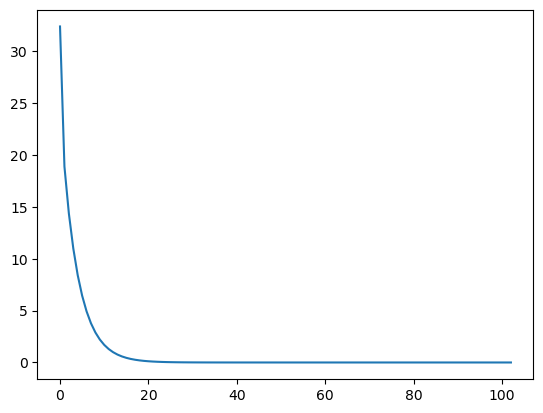

In [14]:
x0=np.array([7,1.5])
x_list,cost_list,grad_list=opt.fixed_step(func.square(),x0,step=0.125,itermax = 500, tol =1.e-5)
plt.plot(cost_list)

Essayer avec plusieurs pas et affichez le nombre d'itérations nécessaires et la valeur finale de `J` obtenur, vous devez faire apparaître le fait qu'un pas trop petit ou trop grand ne fait pas converger

Fonction (x,y) --> x^2/2+7/2*y^2
492
493


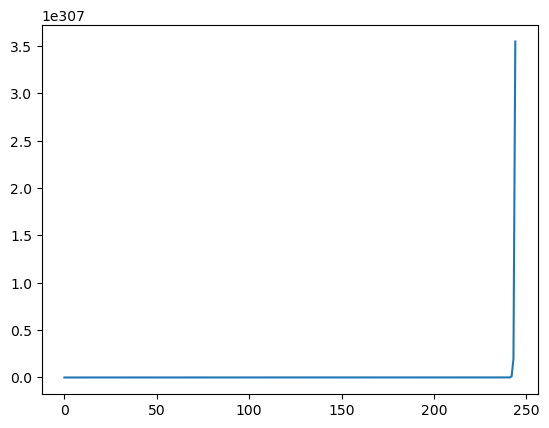

In [16]:
x0=np.array([7,1.5])
x_list,cost_list,grad_list=opt.fixed_step(func.square(),x0,step=0.75,itermax = 500, tol =1.e-5)
plt.plot(cost_list)

##### Ici on voit que lorsqu'on prend un pas trop grand on ne converge plus

Fonction (x,y) --> x^2/2+7/2*y^2
500
501


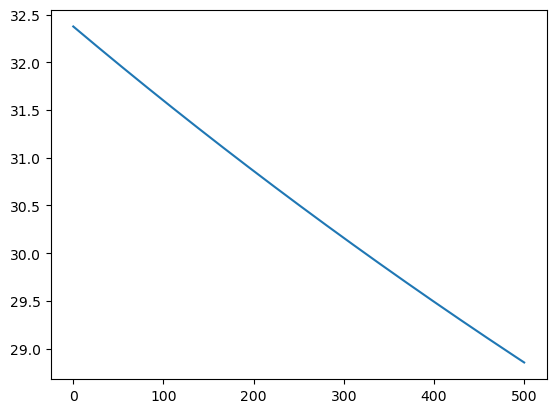

In [17]:
x0=np.array([7,1.5])
x_list,cost_list,grad_list=opt.fixed_step(func.square(),x0,step=0.00005,itermax = 500, tol =1.e-5)
plt.plot(cost_list)

#### Enfin ici on voit que lorsqu'on prend un pas trop petit on ne converge plus non plus

On aimerait maintenant visualiser l'évolution de l'algorithme. En utilisant la fonction `contourf`, affichez sur un même graphique les points de `x_list` et la fonction `square`. Vous devez retrouver et imager les notions vues en cours.

Fonction (x,y) --> x^2/2+7/2*y^2
62
63


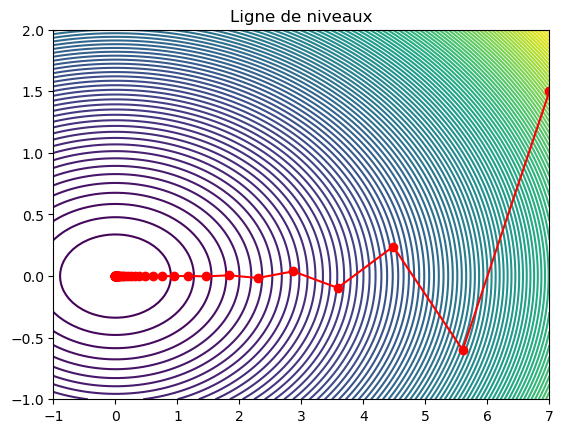

In [18]:
x0=np.array([7,1.5])
f=func.square()
x_list,cost_list,grad_list=opt.fixed_step(f,x0,step=2.e-1)
x = np.linspace(-1.0, 7.0, 100)
y = np.linspace(-1.0, 2.0, 100)
X, Y = np.meshgrid(x, y)
Z = f.eval((X,Y))
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z,levels=100)
ax.set_title('Ligne de niveaux')
x_array = np.array(x_list)
plt.plot(x_array[:,0], x_array[:,1], '-or')


#### Pas optimal

Fonction (x,y) --> x^2/2+7/2*y^2
89
90


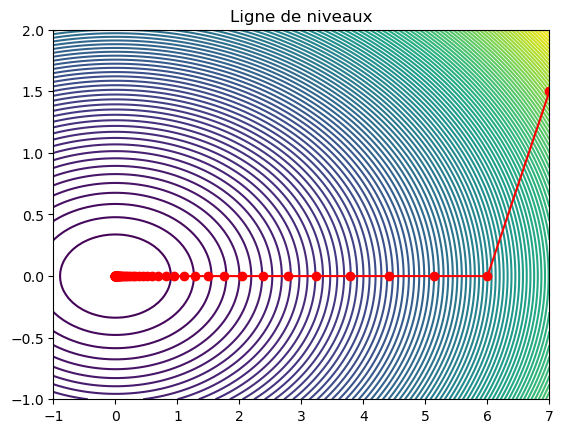

In [19]:
x0=np.array([7,1.5])
f=func.square()
x_list,cost_list,grad_list=opt.fixed_step(f,x0,step=1/7)
x = np.linspace(-1.0, 7.0, 100)
y = np.linspace(-1.0, 2.0, 100)
X, Y = np.meshgrid(x, y)
Z = f.eval((X,Y))
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z,levels=100)
ax.set_title('Ligne de niveaux')
x_array = np.array(x_list)
plt.plot(x_array[:,0], x_array[:,1], '-or')



### Pas > 2/7

Fonction (x,y) --> x^2/2+7/2*y^2
133
134


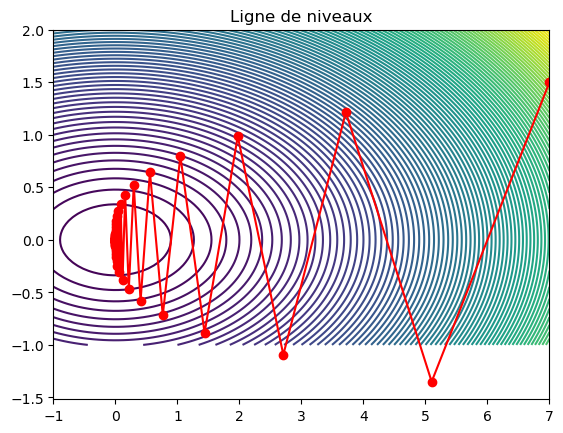

In [20]:
x0=np.array([7,1.5])
f=func.square()
x_list,cost_list,grad_list=opt.fixed_step(f,x0,step=1.9/7)
x = np.linspace(-1.0, 7.0, 100)
y = np.linspace(-1.0, 2.0, 100)
X, Y = np.meshgrid(x, y)
Z = f.eval((X,Y))
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z,levels=100)
ax.set_title('Ligne de niveaux')
x_array = np.array(x_list)
plt.plot(x_array[:,0], x_array[:,1], '-or')

#### Testons pour la fonction Rosenbrock

6
7


/Users/mussard/Desktop/ModIA/optimisation/optimisation_non_convexe/bonTP/TP 1/functions.py:39: RuntimeWarning: overflow encountered in double_scalars
  return 100*(x[1]-x[0]**2)**2+(1-x[0])**2
/Users/mussard/Desktop/ModIA/optimisation/optimisation_non_convexe/bonTP/TP 1/functions.py:42: RuntimeWarning: overflow encountered in double_scalars
  return np.array([400*(x[0]**3-x[1]*x[0])+2*(x[0]-1), 200*(x[1]-x[0]**2)])
/Users/mussard/Desktop/ModIA/optimisation/optimisation_non_convexe/bonTP/TP 1/functions.py:39: RuntimeWarning: invalid value encountered in double_scalars
  return 100*(x[1]-x[0]**2)**2+(1-x[0])**2
/Users/mussard/Desktop/ModIA/optimisation/optimisation_non_convexe/bonTP/TP 1/functions.py:42: RuntimeWarning: invalid value encountered in double_scalars
  return np.array([400*(x[0]**3-x[1]*x[0])+2*(x[0]-1), 200*(x[1]-x[0]**2)])


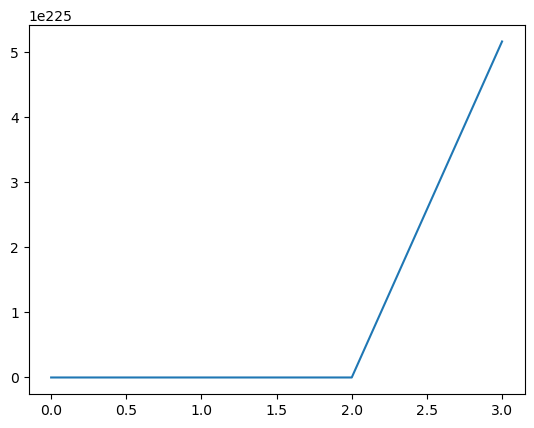

In [21]:
x0=np.array([7,1.5])
x_list,cost_list,grad_list=opt.fixed_step(func.Rosen(),x0,step=0.9,itermax = 1000, tol =1.e-5)
plt.plot(cost_list)

500
501


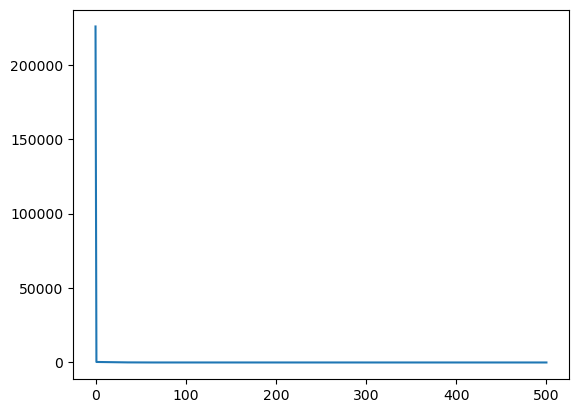

In [22]:
x0=np.array([7,1.5])
x_list,cost_list,grad_list=opt.fixed_step(func.Rosen(),x0,step=0.00005,itermax = 500, tol =1.e-5)
plt.plot(cost_list)

500
501


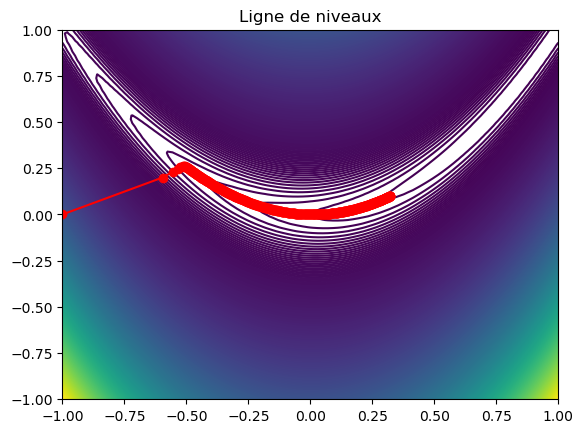

In [23]:
x0=np.array([-1,0])
f=func.Rosen()
x_list,cost_list,grad_list=opt.fixed_step(f,x0,step=1.e-3)
x = np.linspace(-1.0, 1.0, 100)
y = np.linspace(-1.0, 1.0, 100)
X, Y = np.meshgrid(x, y)
Z = f.eval((X,Y))
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z,levels=1000)
ax.set_title('Ligne de niveaux')
x_array = np.array(x_list)
plt.plot(x_array[:,0], x_array[:,1], '-or')


#### Comparaison avec différents pas pour chaque fonction

In [24]:
x0 = np.array([7, 2])
f= func.square()
for s in [0.325, 0.25, 0.125, 0.05, 0.01] :
    x_list,cost_list,grad_list=opt.fixed_step(f,x0,step=s)
    print("step : {:1.2e} iter : {:3d} cost :{:1.3e} grad : {1.3e}".format(s, len(cost_list), cost_list, grad_list))

Fonction (x,y) --> x^2/2+7/2*y^2
500
501


TypeError: unsupported format string passed to list.__format__

## Algorithme de Wolfe
Nous allons maintenant implémenter un algorithme de recherche linéaire de Wolfe, pour cela nous allons définir une fonction 
`Wolfe(J,x_0,e1=1.e-4,e2=0.99,itermax=500,itermax_W=20,tol=1.e-5)`
Les nouveaux arguments sont `e1` et `e2`, les deux paramètres de Wolfe et `itermax_W`, le nombre maximal d'itérations à l'intérieur de l'algorithme de recherche de pas Wolfe. Si ce nombre d'itérations est atteint, on rend la borne inférieur du pas `smin`. Cette fonction doit rendre les variables `x_list,cost_list,grad_list` et aussi une variable `step_list` qui est la liste des pas utilisés

Fonction (x,y) --> x^2/2+7/2*y^2
50


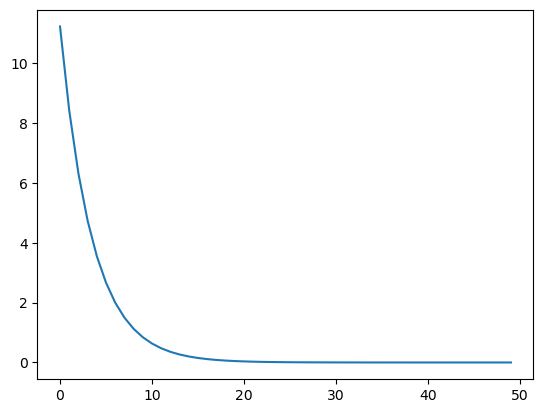

In [27]:
import functions as func
import Optim as opt
x0=np.array([4,1.5])
f=func.square()
x_list,cost_list,grad_list,step_list=opt.Wolfe(f,x0,itermax=500)
print(len(grad_list))
plt.plot(grad_list)

Fonction (x,y) --> x^2/2+7/2*y^2


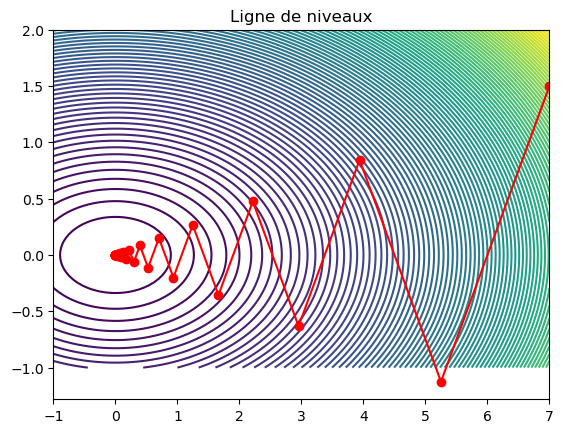

In [13]:
x0=np.array([7,1.5])
f=func.square()
x_list,cost_list,grad_list,_=opt.Wolfe(f,x0,itermax=500, itermax_W=20)
x = np.linspace(-1.0, 7.0, 100)
y = np.linspace(-1.0, 2.0, 100)
X, Y = np.meshgrid(x, y)
Z = f.eval((X,Y))
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z,levels=100)
ax.set_title('Ligne de niveaux')
x_array = np.array(x_list)
plt.plot(x_array[:,0], x_array[:,1], '-or')

#### Avec Rosenbrock

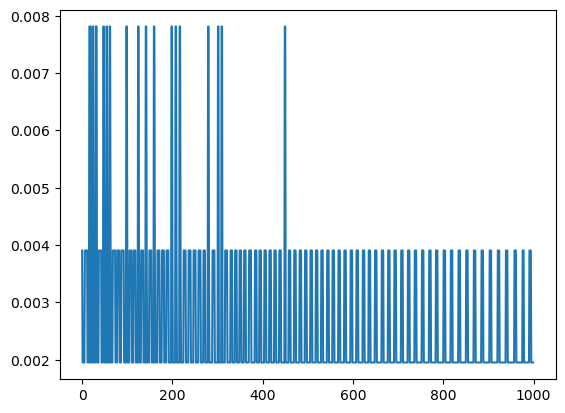

In [119]:
import functions as func
import Optim as opt

x0=np.array([-1,0])
f=func.Rosen()
x_list,cost_list,grad_list,step_list=opt.Wolfe(f,x0,itermax=1000)
plt.plot(step_list)

# Le pas converge bien 

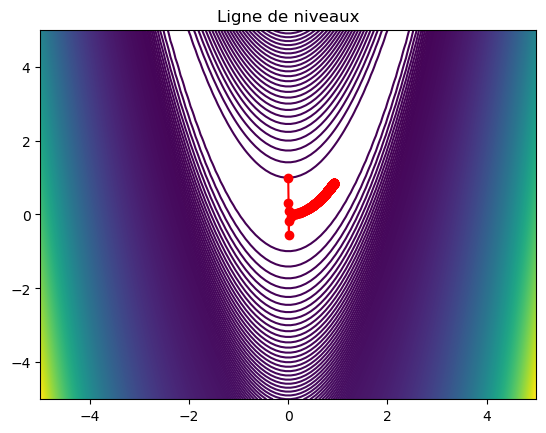

In [125]:
x0=np.array([0,1])
f=func.Rosen()
x_list,cost_list,grad_list,_=opt.Wolfe(f,x0,itermax=1000, itermax_W=100)
x = np.linspace(-5.0, 5.0, 100)
y = np.linspace(-5.0, 5.0, 100)
X, Y = np.meshgrid(x, y)
Z = f.eval((X,Y))
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z,levels=1000)
ax.set_title('Ligne de niveaux')
x_array = np.array(x_list)
plt.plot(x_array[:,0], x_array[:,1], '-or')

Comparez l'algorithme de Wolfe et les algorithmes à pas fixe pour les autres fonctions à minimiser sur le modèle suivant


Fonction (x,y) --> x^2/2+7/2*y^2


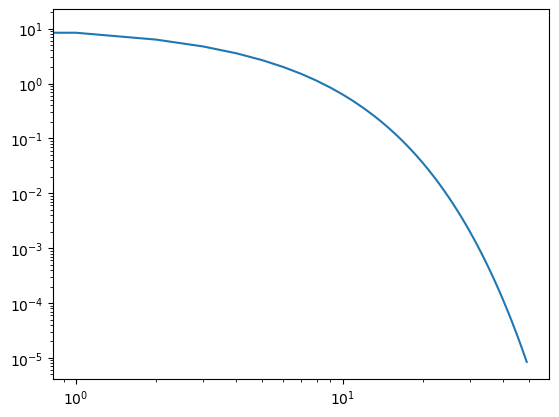

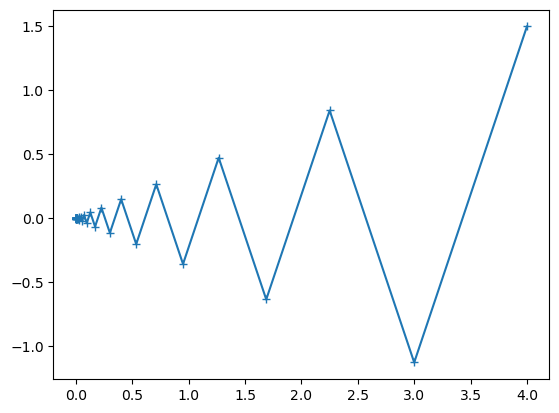

In [98]:
import functions as func
import Optim as opt
f=func.square()
x0=np.array([4,1.5])
x_list,cost_list,grad_list,step_list=opt.Wolfe(f,x0,itermax=10000)
plt.loglog(grad_list)
plt.show()
x_array=np.array(x_list)
plt.plot(x_array[:,0],x_array[:,1],marker='+')
plt.show()


## Etude du coût calcul
Dans les problèmes d'optimisation actuels, le coût de calcul des gradients, des fonctions d'évaluation et des Hessiennes est ce qui limite le calcul d'optimisation. Nous voulons garder trace du nombre de fois où les fonctions `eval`, `grad` et `Hess` sont appelées. Pour cela, nous allons créer à l'initialisation des fonctions 3 compteurs `nb_eval`, `nb_grad` et `nb_Hess` qui seront implémentés dès qu'une des fonction correspondante est appellée. Nous aurons ainsi accès à la fin de l'optimisation à ces compteurs et au nombre d'appel. Implémentez ces compteurs pour les trois fonctions `square`, `Rosen` et `oscill` et comparez les coûts calculs des différents algorithmes d'optimisation. Attention, il est fort possible que vous puissiez gagner ici ou là quelques appels à ces fonctions, regardez bien votre code !!!

Dans la pratique, le coût de calcul de `grad` est le même que celui de `eval` et pour calculer `grad(x)` il est le plus souvent nécessaire d'avoir calculé `eval(x)` juste avant.

In [130]:
#Comparaison des nombres de fois ou la fonction est appelée

f= func.Rosen()
x0 = np.array([-1, 0])
x_list, cost_list, grad_list, step_list = opt.Wolfe(f, x0, itermax= 100000)
string = 'Wolfe {} nb_iter: {} nb_eval: {} nb_grad: {}'
print(string.format(x_list[-1], len(x_list), f.nb_eval, f.nb_grad))

f= func.Rosen()
x0 = np.array([-1, 0])
x_list, cost_list, grad_list = opt.fixed_step(f, x0, step=2.e-3,itermax= 100000)
string = 'Wolfe {} nb_iter: {} nb_eval: {} nb_grad: {}'
print(string.format(x_list[-1], len(x_list), f.nb_eval, f.nb_grad))


f= func.Rosen()
x0 = np.array([-1, 0])
x_list, cost_list, grad_list = opt.fixed_step(f, x0, step=2.e-4,itermax= 100000)
string = 'Wolfe {} nb_iter: {} nb_eval: {} nb_grad: {}'
print(string.format(x_list[-1], len(x_list), f.nb_eval, f.nb_grad))

f= func.Rosen()
x0 = np.array([-2, 2])
x_list, cost_list, grad_list, step_list = opt.Wolfe(f, x0, itermax= 100000)
string = 'Wolfe {} nb_iter: {} nb_eval: {} nb_grad: {}'
print(string.format(x_list[-1], len(x_list), f.nb_eval, f.nb_grad))





Wolfe [0.99998915 0.99997826] nb_iter: 11288 nb_eval: 11885 nb_grad: 11582
Wolfe [0.99998883 0.99997762] nb_iter: 12850 nb_eval: 12850 nb_grad: 25699
Wolfe [0.99988486 0.99976927] nb_iter: 100001 nb_eval: 100001 nb_grad: 200001
Wolfe [1.00001091 1.00002187] nb_iter: 14144 nb_eval: 16479 nb_grad: 15307


In [ ]:
##Avec Wolfe on voit que le nombre d'iteration est différent du nombre d'évaluation car certaines 
##fois on évalue seuleùent J(x)